In [106]:
# Importing Praw library for Reddit API
import praw
reddit = praw.Reddit(
    client_id="nJ08p0RsYR5R_Q",
    client_secret="MqjjuIXYG0Gu5fRTki_pFbcMC_ejMw",
    user_agent="Chatterbot"
)

In [107]:
# Importing necassary libraries
import pandas as pd
import numpy as np
from time import time, ctime, mktime, gmtime

In [108]:
# Reading Hot Posts from Reddit Subreddit WallStreetBets
hot_posts = reddit.subreddit('wallstreetbets').hot(limit=10)
for post in hot_posts:
    print(post.title)

What Are Your Moves Tomorrow, February 11, 2021
InvestorPlace has written a positive article in support of GME Diamond Hands Apes!
When weed stocks are rippin'
We're going *higher* than the moon
Anyone else suspicious about all of these beta ass weed memes?
+1100% on TLRY calls. I used to be retarded but now I'm retarded and able to pay off my car loan
$800 -> $10,800 TLRY🌳
Weed gang 🌳🌳🌳
Candles got me like
I taught myself Blender just to make this


In [139]:
import time
# Using Reddit API to search the forum WallStreetBets for Tilray stock and getting the details on the posts
posts = []
ml_subreddit = reddit.subreddit('wallstreetbets')
for post in ml_subreddit.search("Tilray",sort="new", time_filter='all'):
    # Making data frame and converting time to readable format
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, time.strftime('%Y-%m-%d', gmtime(post.created_utc))])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts.head()

,title,score,id,subreddit,url,num_comments,body,created
0,"Pass the bong and gather round, bros! We're go...",142,lh6ttf,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,101,"Hay hay, Ay, listen up, B, lemme holler at you...",2021-02-10
1,TLRY and APHA - Massive Arbitrage potential?,259,lh5fwm,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,242,It seems that many of those buying Tilray stoc...,2021-02-10
2,TLRY DD: 420.69% gainz,191,lh52hz,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,120,I'll keep this short because my smooth brain c...,2021-02-10
3,$TLRY and $APHA Merger Arbitrage,277,lh3qeg,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,140,\nCurrently Tilray and Aphria are being mispri...,2021-02-10
4,$ACB DD,50,lh2j0v,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,95,I was in ACB like over a year ago and lost a l...,2021-02-10


In [140]:
# Grouping by dates and getting sum of comments
post_grouped = posts.groupby(['created'])
post_sum = post_grouped.sum().sort_values(by='created', ascending = True)
post_sum.head()

,score,num_comments
created,,
2019-08-18,355,77
2019-08-21,13,3
2019-08-28,65,46
2019-11-18,35,108
2019-12-12,20,13


In [141]:
# Defining X and y
X = post_sum.num_comments.index
y = post_sum.num_comments.values

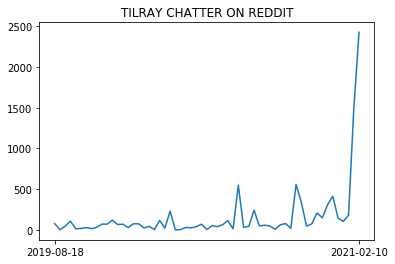

In [142]:
# Ploting X & Y to see trends

import matplotlib.pyplot as plt
labels = X
plt.plot(X, y)
plt.title('TILRAY CHATTER ON REDDIT')
plt.xticks([labels[0], labels[-1]], visible=True, rotation="horizontal")
plt.show()